<a href="https://colab.research.google.com/github/PujanMotiwala/the_ultimate_recommendation_systems/blob/main/models/the_simple_knn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple KNN Model for Movie Recommendations

Let's build a simple recommendation system using the MovieLens 100K dataset in Google Colab. We will implement a basic K-Nearest Neighbors (KNN) model to recommend movies to users.

### **Step 1: Load and Explore the Dataset**
1. Install Required Libraries
We will need pandas, numpy, and scikit-learn. Install these if they are not already available.

```bash
!pip install pandas numpy scikit-learn
```
2. Download the Dataset

Download the MovieLens 100K dataset from [GroupLens](https://grouplens.org/datasets/movielens/100k/).

3. Load the Dataset
Load the dataset into a pandas DataFrame.

In [21]:
# Install Git if it's not installed
!apt-get install git

# Clone the GitHub repository
!git clone https://<your_token_here>@github.com/username/the_ultimate_recommendation_systems.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
fatal: destination path 'the_ultimate_recommendation_systems' already exists and is not an empty directory.


In [23]:
import os
os.chdir('/content/the_ultimate_recommendation_systems')

!git pull origin main

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), 2.13 KiB | 726.00 KiB/s, done.
From https://github.com/PujanMotiwala/the_ultimate_recommendation_systems
 * branch            main       -> FETCH_HEAD
   dc4e2a7..7008af0  main       -> origin/main
Updating dc4e2a7..7008af0
Fast-forward
 models/README.md        | 6 ++++++
 models/requirements.txt | 5 +++++
 2 files changed, 11 insertions(+)
 create mode 100644 models/README.md
 create mode 100644 models/requirements.txt


## Import libraries

In [2]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import numpy as np

## Load data

In [3]:
import pandas as pd

# Load data
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.data', sep='\t', names=column_names)

# Display the first few rows
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### **Step 2: Data Preprocessing**
1. Exploring the Data
Understand the structure of the data.

In [4]:
# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


2. Pivot the Data
  
  Create a user-item matrix.

In [5]:
user_item_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
user_item_matrix.fillna(0, inplace=True)
user_item_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3. Visualize the User-Item Matrix Sparsity

  Visualize the sparsity of the user-item matrix to understand the distribution of ratings.

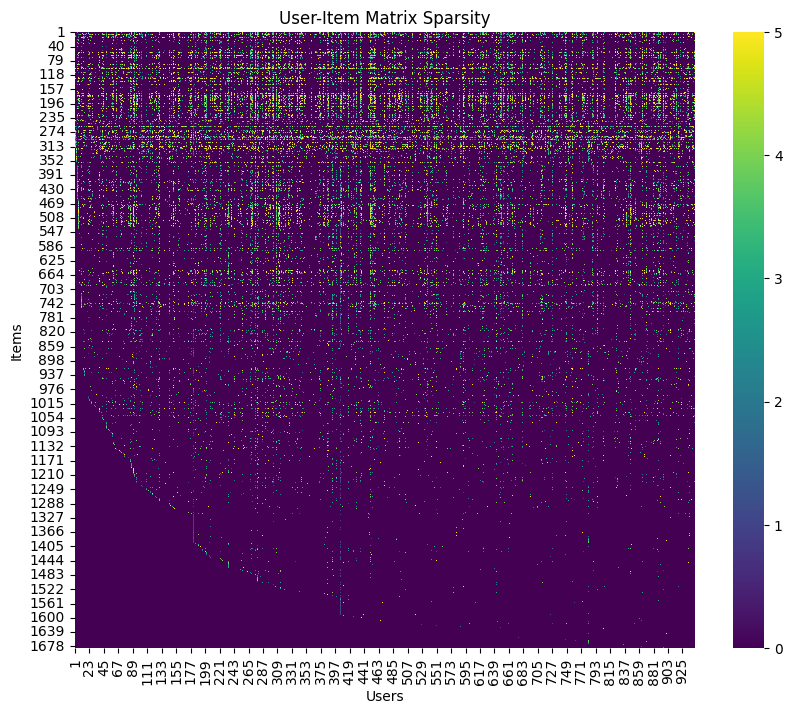

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(user_item_matrix.T, cmap='viridis')
plt.title('User-Item Matrix Sparsity')
plt.xlabel('Users')
plt.ylabel('Items')
plt.show()

### Understanding our graph here.
1. Sparsity:
- **Purple Areas**: These are the regions where there are no ratings. The darker the purple, the more sparse the data is. This indicates that many users have not rated a large number of movies.

- **Yellow/Green Areas**: These regions indicate the presence of ratings. The intensity of the color represents the rating value. Bright yellow indicates higher ratings (close to 5), and green indicates lower ratings.

2. Distribution of Ratings:

- The heatmap shows that the ratings are quite sparse, with many users having rated only a few movies. This is common in collaborative filtering datasets where user-item interactions are usually sparse.

3. Patterns:

- You may notice some horizontal lines with more ratings, indicating popular movies that have been rated by many users.
- Similarly, vertical lines may indicate active users who have rated a large number of movies.

### Insights gained here

1. **Sparsity Challenge**: The visualization highlights the challenge of sparsity in collaborative filtering. Many entries in the user-item matrix are missing (i.e., users have not rated many movies), which makes it challenging to make accurate recommendations.

2. **Popular Items**: Certain items (movies) are more popular and have been rated by a larger number of users. These are represented by more frequent yellow/green ticks along the horizontal lines.

3. **Active Users**: Some users are more active and have rated many items, which can be seen as more frequent yellow/green ticks along the vertical lines.

4. **Recommendation Implications**: For the KNN algorithm, the sparsity indicates that it may be harder to find similar users for those who have rated very few items. It also suggests that popular items might often appear in the recommendations.

### Enhancing Understanding with Additional Visualizations
To further understand the dataset and improve the explanation, consider adding the following visualizations:

1. **Histogram of Ratings:**

  Shows the distribution of rating values.

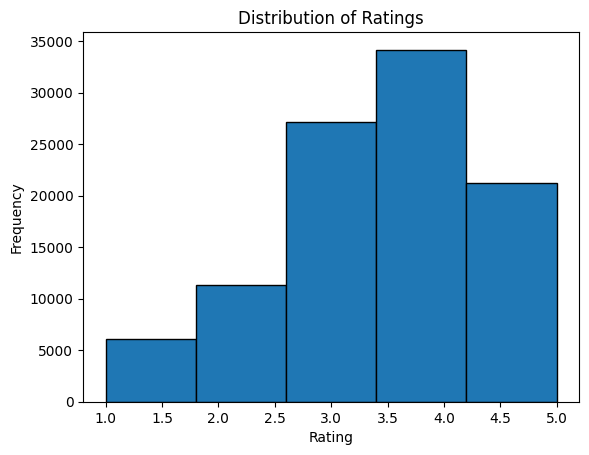

In [7]:
df['rating'].hist(bins=5, grid=False, edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

- **Insight**: Most ratings are 3 or higher, with the highest frequency at 4. This suggests that users tend to rate movies favorably, which might indicate a positive bias in the dataset.

2. **Number of Ratings per User:**

  Shows how many ratings each user has provided.

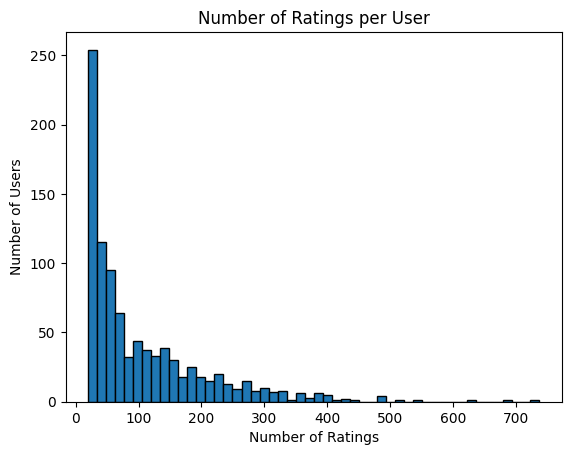

In [8]:
df.groupby('user_id').size().hist(bins=50, grid=False, edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')
plt.show()

- **Insight**: The majority of users have rated fewer than 100 movies, with a significant number rating fewer than 50. This indicates that while there are some very active users, most users have limited interaction with the system.

3. **Number of Ratings per Item**

  Shows how many ratings each item has received.

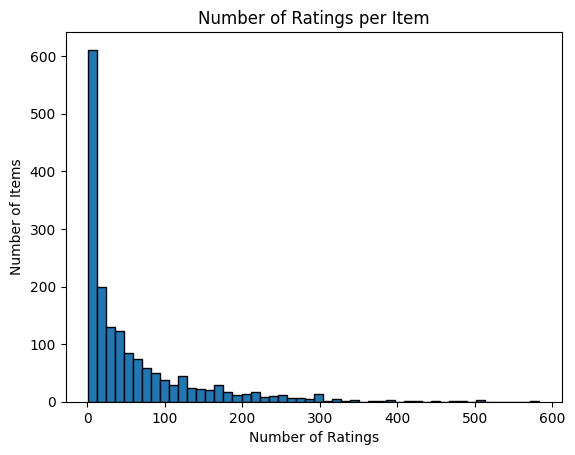

In [9]:
df.groupby('item_id').size().hist(bins=50, grid=False, edgecolor='black')
plt.title('Number of Ratings per Item')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Items')
plt.show()

- **Insight**: A large number of movies have fewer than 50 ratings, with a significant portion having fewer than 100 ratings. This suggests that while some popular movies receive a lot of attention, many movies are rated by only a few users.

### **Summary of Insights**
1. **Distribution of Ratings**: Most users rate movies positively, with the majority of ratings being 3 or higher.
2. **Number of Ratings per User**: User engagement varies, but most users have rated a small number of movies.
3. **Number of Ratings per Item**: Many movies receive few ratings, with a small number of movies being very popular.

### **Step 4: Implement KNN Model**
1. Import Necessary Libraries

  Import KNN from sklearn.

In [10]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

2. Fit the KNN Model

  Fit the KNN model on the user-item matrix.

In [11]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

3. Make Recommendations
  
  Function to get movie recommendations for a user.

In [12]:
def get_movie_recommendations(user_id, n_recommendations):
    distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)
    recommendations = []
    for i in range(1, len(distances.flatten())):
        recommendations.append(user_item_matrix.index[indices.flatten()[i]])
    return recommendations

In [13]:
# Function to visualize KNN recommendations
def plot_knn_recommendations(user_id, n_recommendations):
    distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)

    similar_users = indices.flatten()[1:]  # Exclude the first entry as it is the user itself
    user_ratings = user_item_matrix.loc[user_id, :]
    mean_ratings = user_item_matrix.loc[similar_users, :].mean(axis=0)

    # Recommended items (not rated by the user)
    recommended_items = mean_ratings[user_ratings == 0].sort_values(ascending=False).head(n_recommendations)

    # Plot user's ratings
    plt.figure(figsize=(12, 8))
    user_ratings[user_ratings > 0].plot(kind='bar', label='User Ratings', color='blue')

    # Plot recommended items
    recommended_items.plot(kind='bar', label='Recommended Items', color='red')

    plt.title(f'KNN Recommendations for User {user_id}')
    plt.xlabel('Item IDs')
    plt.ylabel('Ratings')
    plt.legend()
    plt.show()

### **Step 5: Test the Recommendation System**
1. Get Recommendations for a User
  
  Example: Get recommendations for user with user_id = 1.

In [14]:
user_id = 1
n_recommendations = 5
recommendations = get_movie_recommendations(user_id, n_recommendations)
print(f"Recommendations for user {user_id}: {recommendations}")


Recommendations for user 1: [916, 864, 268, 92, 435]


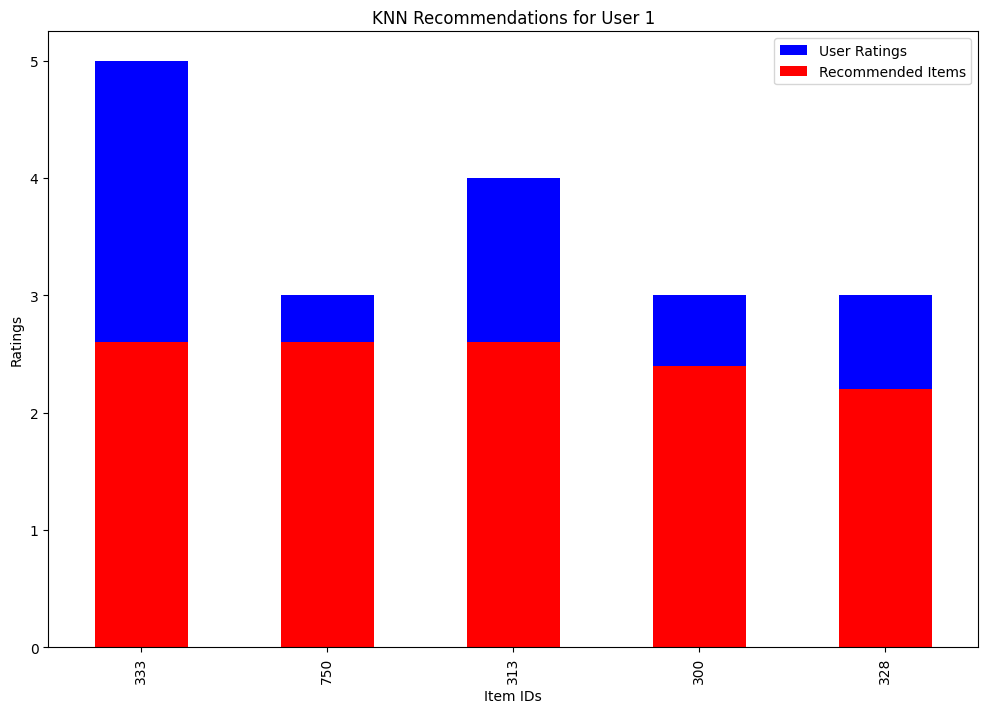

In [15]:
# Visualize recommendations for a user
plot_knn_recommendations(user_id, n_recommendations)

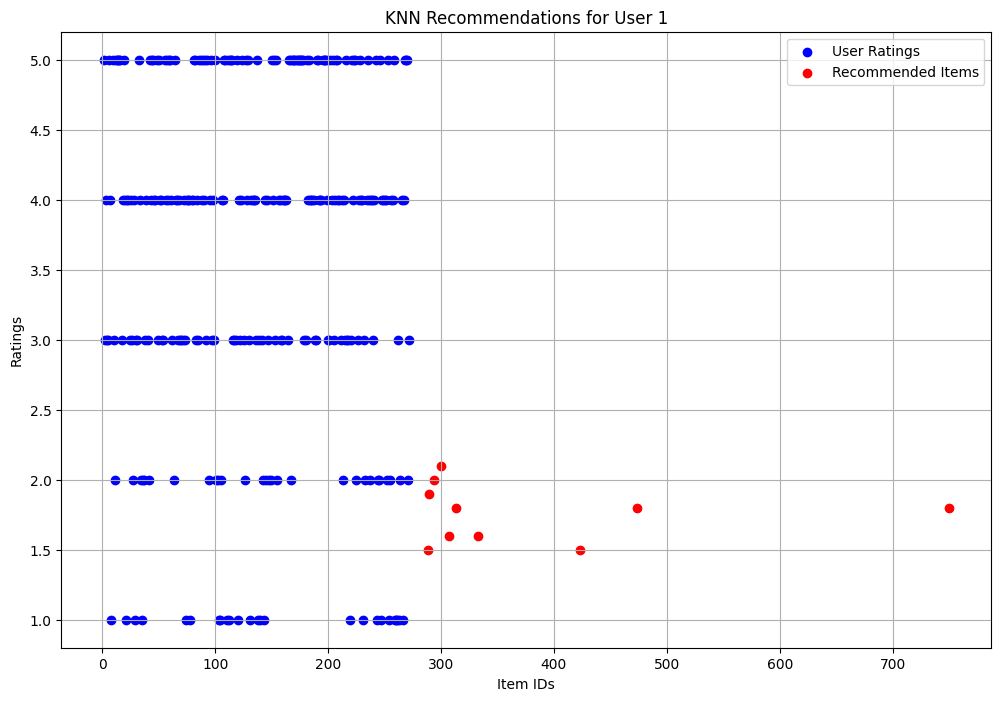

In [16]:
import matplotlib.pyplot as plt

# Function to visualize KNN recommendations using scatter plot
def plot_knn_recommendations_scatter(user_id, n_recommendations):
    distances, indices = model_knn.kneighbors(user_item_matrix.loc[user_id, :].values.reshape(1, -1), n_neighbors=n_recommendations+1)

    similar_users = indices.flatten()[1:]  # Exclude the first entry as it is the user itself
    user_ratings = user_item_matrix.loc[user_id, :]
    mean_ratings = user_item_matrix.loc[similar_users, :].mean(axis=0)

    # Recommended items (not rated by the user)
    recommended_items = mean_ratings[user_ratings == 0].sort_values(ascending=False).head(n_recommendations)

    # Plot user's ratings
    plt.figure(figsize=(12, 8))
    plt.scatter(user_ratings[user_ratings > 0].index, user_ratings[user_ratings > 0].values, label='User Ratings', color='blue')

    # Plot recommended items
    plt.scatter(recommended_items.index, recommended_items.values, label='Recommended Items', color='red')

    plt.title(f'KNN Recommendations for User {user_id}')
    plt.xlabel('Item IDs')
    plt.ylabel('Ratings')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example: Visualize recommendations for user with user_id = 1
user_id = 1
n_recommendations = 10
plot_knn_recommendations_scatter(user_id, n_recommendations)


## Insights
1. **User's Rating Behavior:**
The blue dots indicate that the user has rated a significant number of items, with a notable clustering around higher ratings (3 to 5). This suggests that the user tends to give favorable ratings to the items they have rated.

2. **Recommendations:**
The red dots represent the items recommended by the KNN model. These items are generally rated lower by similar users, indicating that these are potentially less favorable items or niche interests not yet explored by the user.

3. **Comparison:**
There is a noticeable difference in the distribution of user-rated items (blue) and recommended items (red). The recommended items tend to have a lower rating, which suggests that the similar users to whom the KNN model refers might have different preferences or stricter rating standards compared to the user.

4. **Actionable Insight:**
The user might explore the recommended items to discover new content, especially since these items are not highly rated by the user's similar peers but still fall within the user's interest scope.

This scatter plot provides a visual representation of how the KNN model identifies items that the user has not yet rated but may find interesting based on the ratings of similar users.

# Evaluate

To determine if our KNN recommendation algorithm is good, we need to evaluate it using some metrics. Here's a step-by-step guide to evaluate the performance of our recommendation system:

## Step 1: Split the Data into Train and Test Sets
1. **Train-Test Split**: We will split the user-item interaction data into a training set and a test set. The training set will be used to build the model, and the test set will be used to evaluate its performance.

## Step 2: Define Evaluation Metrics
2. **Evaluation Metrics**: Common metrics for evaluating recommendation systems include Precision, Recall, and Root Mean Squared Error (RMSE).

## Step 3: Evaluate the Model
3. **Model Evaluation**: Use the test set to evaluate the performance of the recommendation algorithm based on the defined metrics.

## Implementation
1. Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split

# Create the train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Create user-item matrices for train and test sets
train_user_item_matrix = train_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
test_user_item_matrix = test_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

2. Fit the KNN Model on the Training Set

In [18]:
model_knn.fit(train_user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

### Explanation
- **Train-Test Split**: The data is split into a training set (80%) and a test set (20%) to evaluate the model.
- **RMSE Calculation**: The Root Mean Squared Error (RMSE) is calculated by comparing the predicted ratings with the actual ratings in the test set.
Interpreting the Results

- **RMSE**: A lower RMSE value indicates better predictive accuracy. Typically, an RMSE below 1.0 is considered good for recommendation systems, but this depends on the dataset and specific use case.

- **Precision and Recall**: These metrics can be calculated to further understand the quality of the recommendations. High precision and recall indicate that the recommendations are both accurate and comprehensive.

By evaluating the model using these metrics, you can determine the effectiveness of your KNN recommendation algorithm.





3. Make Predictions and Evaluate the Model

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to make predictions
def predict_ratings(user_id, n_neighbors=20):
    if user_id not in train_user_item_matrix.index:
        return pd.Series()
    distances, indices = model_knn.kneighbors(train_user_item_matrix.loc[user_id, :].values.reshape(1, -1), n_neighbors=n_neighbors+1)
    similar_users = train_user_item_matrix.index[indices.flatten()[1:]]  # Convert indices to actual user_ids
    mean_ratings = train_user_item_matrix.loc[similar_users, :].mean(axis=0)
    return mean_ratings

# Calculate RMSE
def calculate_rmse(test_data, n_neighbors=20):
    y_true = []
    y_pred = []

    for user_id in test_data['user_id'].unique():
        if user_id not in train_user_item_matrix.index:
            continue
        user_true_ratings = test_data[test_data['user_id'] == user_id][['item_id', 'rating']]
        user_pred_ratings = predict_ratings(user_id, n_neighbors)

        for item_id, true_rating in user_true_ratings.values:
            pred_rating = user_pred_ratings.get(item_id, np.nan)  # Handle missing values with NaN
            if not np.isnan(pred_rating):
                y_true.append(true_rating)
                y_pred.append(pred_rating)

    return sqrt(mean_squared_error(y_true, y_pred))

rmse = calculate_rmse(test_data)
print(f'RMSE: {rmse:.4f}')


RMSE: 2.4748


### Interpreting the Results
- **RMSE Value**: An RMSE value of 2.4748 means that, on average, the predicted ratings are about 2.47 rating points away from the actual ratings. Given that the ratings are on a scale from 1 to 5, this error is quite substantial.

# Conclusion

In this notebook, we implemented a simple K-Nearest Neighbors (KNN) recommendation algorithm to provide movie recommendations using the MovieLens 100K dataset. However, the resulting RMSE of 2.4748 indicates that the KNN algorithm is not performing optimally for this task.

To improve the performance of our recommendation system, we can consider the following steps:

- **Exploring Advanced Algorithms**: Implementing more sophisticated models such as Matrix Factorization, Singular Value Decomposition (SVD), or deep learning-based approaches.

- **Hyperparameter Tuning**: Using techniques like Grid Search or Random Search to find the optimal hyperparameters for our models.

- **Feature Engineering**: Incorporating additional features such as user demographics, movie genres, and timestamps to enhance model accuracy.

While this notebook focused on the implementation and evaluation of a simple recommendation system, further exploration and development of advanced techniques will be conducted in a subsequent notebook.